In [1]:
!git clone https://github.com/Srinivas26k/AI-Algorithm-Project.git


Cloning into 'AI-Algorithm-Project'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 4), reused 19 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 46.76 KiB | 1.73 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
%cd AI-Algorithm-Project


/content/AI-Algorithm-Project


In [3]:
!ls

data  LICENSE  models  README.md  src


In [7]:
data_path = '/content/AI-Algorithm-Project/data/processed_data/train_cleaned.csv'
df = pd.read_csv(data_path)


In [8]:
import os
print("File exists:", os.path.exists(data_path))


File exists: True


In [9]:
import pandas as pd
data_path = '/content/AI-Algorithm-Project/data/processed_data/train_cleaned.csv'
df = pd.read_csv(data_path)


In [10]:
# Display the first few rows
df.head()


,num__Age,num__Fare,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,Survived
0,-0.563674,-0.500240,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
1,0.669217,0.788947,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
2,-0.255451,-0.486650,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
3,0.438050,0.422861,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,0.438050,-0.484133,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0


In [11]:
# Check for null values
df.isnull().sum()


,0
num__Age,0
num__Fare,0
cat__Pclass_1,0
cat__Pclass_2,0
cat__Pclass_3,0
cat__Sex_female,0
cat__Sex_male,0
cat__Embarked_C,0
cat__Embarked_Q,0
cat__Embarked_S,0


In [12]:
# Summary statistics
df.describe()


,num__Age,num__Fare,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,Survived
count,8.890000e+02,8.890000e+02,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.677523e-16,1.478632e-16,0.240720,0.206974,0.552306,0.350956,0.649044,0.188976,0.086614,0.724409,0.382452
std,1.000563e+00,1.000563e+00,0.427761,0.405365,0.497536,0.477538,0.477538,0.391710,0.281427,0.447063,0.486260
min,-2.226536e+00,-6.462044e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.636741e-01,-4.872378e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.013399e-01,-3.551972e-01,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,4.380499e-01,-2.207954e-02,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.905556e+00,9.668551e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


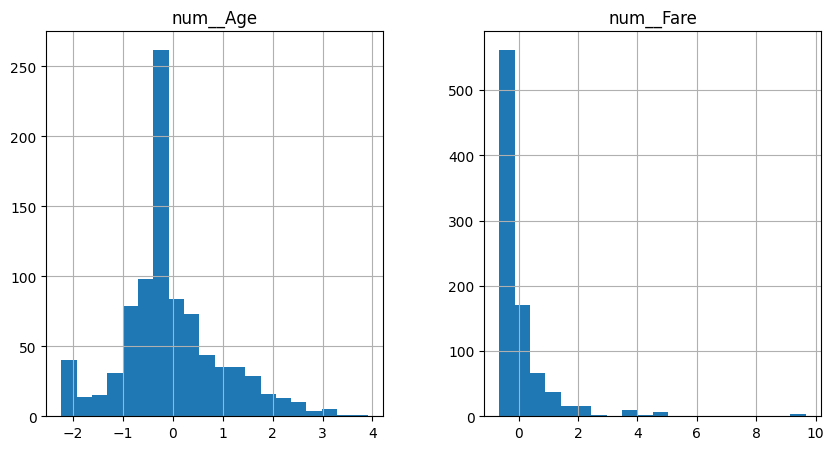

In [14]:
#Histogram of Numerical Features: Visualize distributions of features like 'Age' and 'Fare' to see their spread and detect outliers.
import matplotlib.pyplot as plt
df[['num__Age', 'num__Fare']].hist(bins=20, figsize=(10, 5))
plt.show()

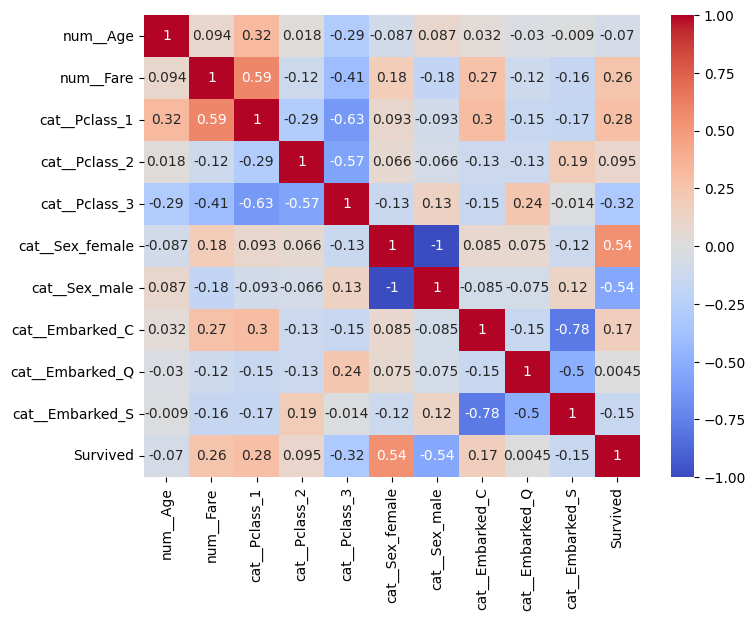

In [15]:
#Correlation Heatmap: Identify correlations between numeric features and the target variable 'Survived'.
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
print(df.columns)


Index(['num__Age', 'num__Fare', 'cat__Pclass_1', 'cat__Pclass_2',
       'cat__Pclass_3', 'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S', 'Survived'],
      dtype='object')


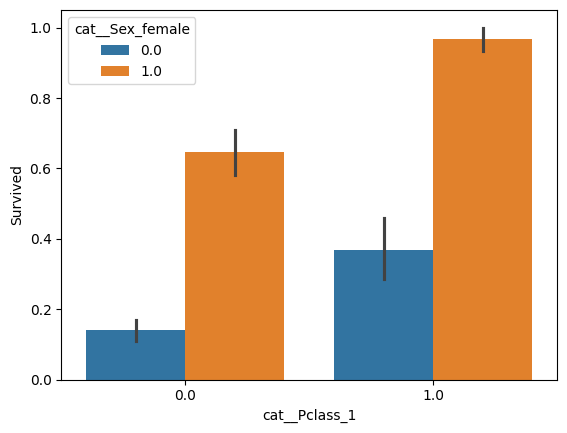

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(
    x='cat__Pclass_1',
    y='Survived',
    hue='cat__Sex_female',
    data=df
)
plt.show()


In [20]:
import numpy as np

# Reconstruct 'Pclass' column
df['Pclass'] = np.where(df['cat__Pclass_1'] == 1, 1,
                        np.where(df['cat__Pclass_2'] == 1, 2, 3))

# Reconstruct 'Sex' column
df['Sex'] = np.where(df['cat__Sex_female'] == 1, 'female', 'male')


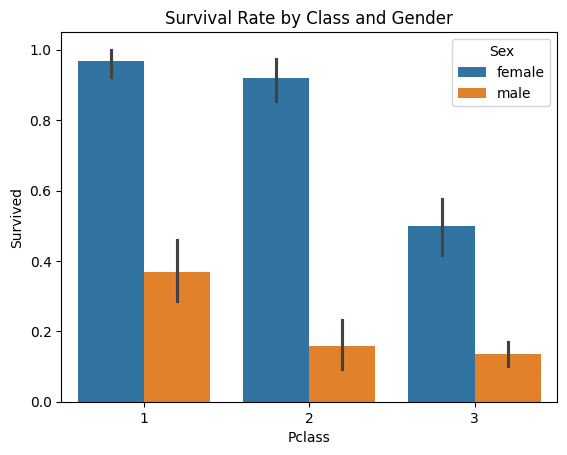

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot for survival rates by class and gender
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title("Survival Rate by Class and Gender")
plt.show()


<ipython-input-22-712a92df40d4>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Survived'] == 1, 'num__Age'], label='Survived', shade=True)
<ipython-input-22-712a92df40d4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Survived'] == 0, 'num__Age'], label='Did not Survive', shade=True)


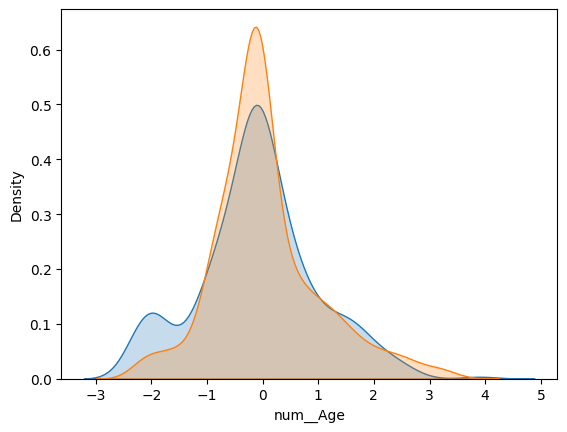

In [22]:
sns.kdeplot(df.loc[df['Survived'] == 1, 'num__Age'], label='Survived', shade=True)
sns.kdeplot(df.loc[df['Survived'] == 0, 'num__Age'], label='Did not Survive', shade=True)
plt.xlabel('num__Age')
plt.ylabel('Density')
plt.show()
